# Project: Investigate TMDB Movie Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The TMDB movie data is provided by Udacity and originally from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata/data).<br>
The dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, budget, revenue. The dataset also covers a duration from 1960 to 2015.<br>
By following the steps in a typical data analysis process, this project will perform data wrangling and explore the TMDB movie dataset to unfold trends and insight regarding the research questions proposed.<br>
The research questions include:
- Distribution of average vote
- Distribution of movie runtime
- Trend regarding number of released movies over the past half century
- Trends of keywords among different decades
- Average rating of horror films vs. non-horror films
- Horror films in percentage of all films since 1990

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# set plot style
sns.set_style('darkgrid')
# use magic command to embed visualization in notebook
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Work on data gathering, assessing, and cleaning of the dataset to get it ready for Exploratory Data Analysis

### 1. Data Gathering

In [2]:
# read the movie dataset: tmdb-movies.csv
df = pd.read_csv('tmdb-movies.csv')

### 2. Data Assessing

In [3]:
# load a few records to see what the table looks like
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


**Quality Issue 1**: extraneous columns (e.g. imdb_id, overview) <br>
**Quality Issue 2**: cast, genres, production_companies with multiple values

Certain columns are trimmed from the sample table. <br>
So I go on to check the summary of the dataset

In [4]:
# get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# get all the columns containing null values
c_with_null = []
for c in df.columns:
    if not df[c].isnull().sum()==0:
        c_with_null.append(c)
print(c_with_null)

['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies']


In [6]:
# get the total of columns with null
len(c_with_null)

9

**Quality Issue 3**: 9 columns containing null values

**Quality Issue 4**: id & release_year are integers not strings

In [7]:
# get a sample of keywords column 
df.keywords.sample(3)

4545    undercover|fbi|college|private investigator|so...
8287    secret love|mohawk|18th century|american india...
6159                                        spy|biography
Name: keywords, dtype: object

**Quality Issue 2 (continued)**: keywords with multiple values

In [8]:
# check duplicates
df.duplicated().sum()

1

**Quality Issue 5**: 1 duplicated record

In [9]:
# get a statistical summary of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In the statistical summary, I observe budget, revenue, runtime, budget_adj, revenue_adj with values of 0. This is worth looking into. 

In [10]:
# get the counts of 0 values for the columns  
zero_col = ['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']
for col in zero_col:
    zero_count = df.groupby(col).count()['id'][0]
    print(col, zero_count)

budget 5696
revenue 6016
runtime 31
budget_adj 5696
revenue_adj 6016


runtime column has small amount of zero values, while other four columns have significant amounts

Check whether the zero values are simply missing data, or very small amount of runtime to be recorded as zero

In [11]:
# check the number of movies with short runtime (<10 min)
df_test1 = df.query('runtime < 10')
df_test1.runtime.value_counts()

0    31
6    22
7    17
5    17
4    17
3    11
8     9
9     7
2     5
Name: runtime, dtype: int64

Runtime less than 5 minutes is still recorded. So I assume for runtime, zero values are missing data. <br> <br>

Now I move on to check budget, revenue, budget_adj, revenue_adj.

In [12]:
# get a sample of movies with 0 in budget and revenue
df_test2 = df.query('budget == 0 and revenue == 0')
df_test2.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.0


From the sample, I pick the movie "Me and Earl and the Dying Girl" and online search. <br>
The movies's [wikipedia page](https://en.wikipedia.org/wiki/Me_and_Earl_and_the_Dying_Girl_(film)) listed its budget 8 million dollars, revenue 9.1 million dollars. <br>
So I further assume zero values are missing data for budget, revenue, budget_adj, revenue_adj

**Quality Issue 6**: small amount of missing values (0) in runtime; significant amount in budget, revenue, budget_adj, revenue_adj

## Assessment Summary
- extraneous columns (e.g. imdb_id, overview)
- cast, keywords, genres, production_companies with multiple values
- 9 columns containing null values
- id & release_year are integers not strings
- 1 duplicated record
- small amount of missing values (0) in runtime; significant amount in budget, revenue, budget_adj, revenue_adj

### 3. Data Cleaning

In [13]:
# make a copy of the dataset
df_clean = df.copy()

**Quality Issue 1**: drop extraneous columns

In [14]:
# drop columns not used in my analysis
df_clean.drop(columns = ['imdb_id', 'cast', 'homepage', 'tagline', 'overview', 'release_date'], inplace = True)


In [15]:
# verify the columns have been dropped
drop_columns = ['imdb_id', 'cast', 'homepage', 'tagline', 'overview', 'release_date']
for c in drop_columns:
    if c in df_clean.columns:
        print(c,1)
    else:
        print(c,0)

imdb_id 0
cast 0
homepage 0
tagline 0
overview 0
release_date 0


**Quality Issue 2**: no action

`Reasoning`: <br>
cast, keywords, genres, and production_companies contain multiple values seperated by verticle bar in each cell. <br> But I won't do any change because each movie is usually with more than one genres and production companies involved, and always has multiple cast members and several keywords for summary. <br> The table would be very huge if I split each of them into seperate rows. <br> I will handle this quality issue if and only if I decide to use one or more of these 4 columns in exploratory data analysis

**Quality Issue 3**: drop only column(s) with insignificant amount of null values

In [16]:
# display all the columns containing null values in df_clean 
null_columns = []
for c in df_clean.columns:
    if not df_clean[c].isnull().sum()==0:
        null_columns.append(c)
null_columns

['director', 'keywords', 'genres', 'production_companies']

In [17]:
# check the number of null values
for col in null_columns:
    sum_null = df_clean[col].isnull().sum()
    print(col, sum_null)

director 44
keywords 1493
genres 23
production_companies 1030


`Reasoning`: <br>
The totals of the null values in director and genres are insignificant. <br>
Dropping them won't impact data integrity.

In [18]:
# drop null from these two columns
col_drop = ['director','genres']
df_clean.dropna(subset = col_drop, inplace = True)

In [19]:
# verify no null for these two columns
for col in ['director','genres']:
    num_null = df_clean[col].isnull().sum()
    print(col, num_null)

director 0
genres 0


`Reasoning`: <br>
keywords and production_companies both have a considerable amount of null values. <br> Dropping them has the side effect of losing valuable information on those records, and thus impact data integrity. <br> I decide to keep null values in these two columns, but I need to be extra careful if later on I use these two columns for analysis.

**Quality Issue 4**: convert id and release_year from integer to string

In [20]:
# convert datatypes
df_clean.id = df_clean.id.astype(str)
df_clean.release_year = df_clean.release_year.astype(str)

In [21]:
# check the updated datatypes 
id_dtype = type(df_clean.id[0])
year_dtype = type(df_clean.release_year[0])
print('id', id_dtype)
print('release_year', year_dtype)

id <class 'str'>
release_year <class 'str'>


**Quality Issue 5**: drop duplicated record

In [22]:
# dedupe
df_clean.drop_duplicates(inplace = True)

In [23]:
# verify no duplicate exists
df_clean.duplicated().sum()

0

**Quality Issue 6**: 
- drop zero from column(s) with small count of zero
- drop budget and revenue columns
- replace zero with null for columns with significant count 

In [24]:
# as a refresher, display columns with 0 values in original dataset df
zero_col

['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']

In [25]:
# get the counts of 0 values for each in zero_col
for col in zero_col:
    zero_count = df.groupby(col).count()['id'][0]
    print(col, zero_count)

budget 5696
revenue 6016
runtime 31
budget_adj 5696
revenue_adj 6016


`Reasoning`: <br>
runtime has small amount of zero values. <br>
dropping them won't impact data integrity, so I drop them.

In [26]:
# drop zero values of runtime column
df_clean = df_clean.query('runtime != 0')

In [27]:
# verify no zero values in runtime column
df_clean.query('runtime == 0')['runtime'].count()

0

`Reasoning`: <br>
budget_adj, revenue_adj columns are budget and revenue values adjusted for inflation. <br> I favor them over budget and revenue columns when exploring trends over time. <br> So I drop budget and revenue columns.

In [28]:
# drop columns 
df_clean.drop(columns = ['budget', 'revenue'], inplace = True)

In [29]:
# verify columns are dropped
drop_columns = ['budget', 'revenue']
for c in drop_columns:
    if c not in df_clean.columns:
        print(c)

budget
revenue


`Reasoning`: <br>
budget_adj, revenue_adj both have significant amount of zero values. <br> Dropping their zero values will impact data integrity. <br> So instead, I replace 0 with Null using `np.NaN`.

In [30]:
# replace 0 with null in budget_adj, revenue_adj 
df_clean['budget_adj'].replace(0, np.NaN, inplace = True)
df_clean['revenue_adj'].replace(0, np.NaN, inplace = True)

In [31]:
# confirm the change
# first check the counts of null in both columns from original dataset df
replace_list = ['budget_adj', 'revenue_adj']
for x in replace_list:
    print(x, df[x].isnull().sum())

budget_adj 0
revenue_adj 0


In [32]:
# then check the counts of null in these two columns after replacement in df_clean
[print(x, df_clean[x].isnull().sum()) for x in replace_list]

budget_adj 5611
revenue_adj 5924


[None, None]

## Datasets after Wrangling

In [33]:
# get a summary of the df_clean
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10772 entries, 0 to 10865
Data columns (total 13 columns):
id                      10772 non-null object
popularity              10772 non-null float64
original_title          10772 non-null object
director                10772 non-null object
keywords                9338 non-null object
runtime                 10772 non-null int64
genres                  10772 non-null object
production_companies    9793 non-null object
vote_count              10772 non-null int64
vote_average            10772 non-null float64
release_year            10772 non-null object
budget_adj              5161 non-null float64
revenue_adj             4848 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1.2+ MB


In [34]:
# check columns with null
for x in df_clean.columns:
    if df_clean[x].isnull().sum() != 0:
        print(x)

keywords
production_companies
budget_adj
revenue_adj


After wrangling, the dataset now holds 10772 rows and 13 columns. 4 columns with null: keywords, production_companies, budget_adj, revenue_adj.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What is the distribution of average vote? 

I'll use vote_average to plot a histogram and investigate its distribution. But before that, I need to first get a high-level overview of the data.

In [35]:
# get a descriptive statistic summary
df_clean.describe()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10772.000000,10772.000000,10772.000000,10772.000000,5.161000e+03,4.848000e+03
mean,0.650643,102.455347,219.114463,5.972289,3.694143e+07,1.151223e+08
std,1.003319,30.379156,577.826118,0.932877,4.197228e+07,1.988706e+08
min,0.000188,2.000000,10.000000,1.500000,9.210911e-01,2.370705e+00
25%,0.209987,90.000000,17.000000,5.400000,8.131203e+06,1.046477e+07
50%,0.386176,99.000000,39.000000,6.000000,2.278180e+07,4.396405e+07
75%,0.718889,112.000000,147.000000,6.600000,5.008384e+07,1.316524e+08
max,32.985763,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


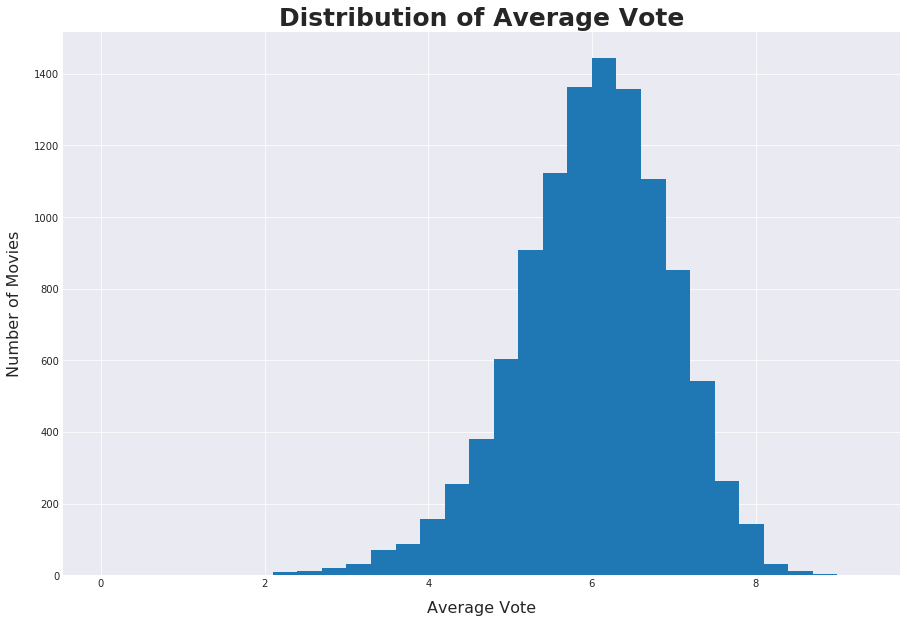

In [36]:
# plot a standard-scaled histogram with binsize of 0.3
binsize = 0.3
bins = np.arange(0, df_clean.vote_average.max()+binsize, binsize)

plt.figure(figsize=[15, 10])
plt.hist(data = df_clean, x = 'vote_average', bins = bins)

# customize labels and title
plt.xlabel('Average Vote', fontsize = 16, labelpad = 12)
plt.ylabel('Number of Movies', fontsize = 16, labelpad = 12)
plt.title('Distribution of Average Vote', fontweight = 'bold', fontsize = 25)
plt.show()

**Observation 1**: The distribtution of average vote is unimodal with very slight left skew. Big part of the data falls between 5 to 7.

### Research Question 2: What is the distribution of movie run time?

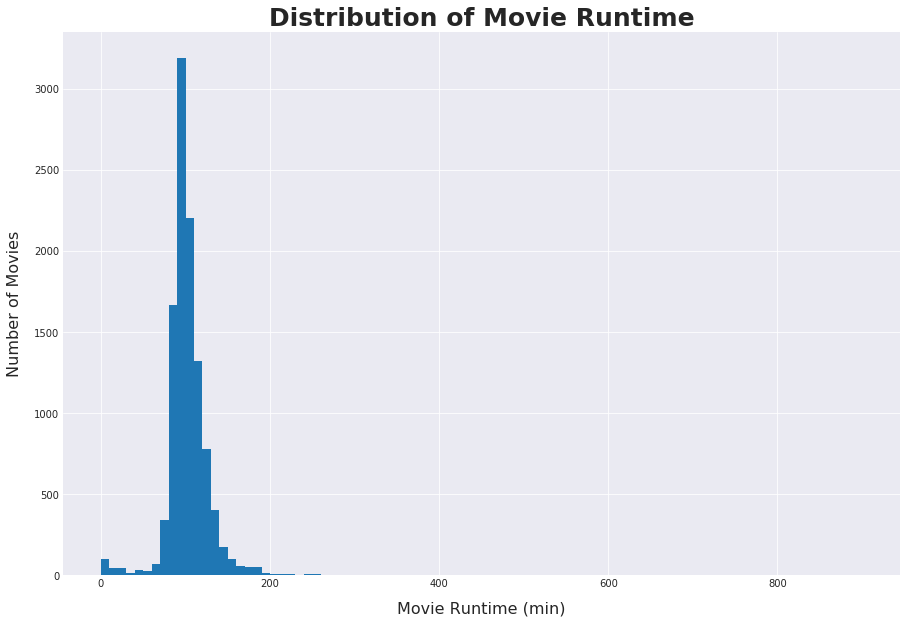

In [37]:
# plot a standard-scaled histogram with binsize of 10
binsize = 10
bins = np.arange(0, df_clean.runtime.max()+binsize, binsize)

plt.figure(figsize=[15, 10])
plt.hist(data = df_clean, x = 'runtime', bins = bins)

# customize labels and title
plt.xlabel('Movie Runtime (min)', fontsize = 16, labelpad = 12)
plt.ylabel('Number of Movies', fontsize = 16, labelpad = 12)
plt.title('Distribution of Movie Runtime', fontweight = 'bold', fontsize = 25)
plt.show()

**Observation 2.1**: In the distribtution of runtime, most of the data falls on the far left of the axe, suggesting strong outliers on the right.

Next I'll identify these outliers. I define outliers as movies with runtime over 240 min, in other words, 4 hours in total. 

In [38]:
# select high outliers by obervation from the plot
high_outliers = (df_clean['runtime'] > 240) 
print(high_outliers.sum())
df_clean.loc[high_outliers,:].sort_values(by='runtime', ascending = False)

40


,id,popularity,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,0.006925,The Story of Film: An Odyssey,Mark Cousins,cinema|nouvelle vague|hindi cinema|cinema novo...,900,Documentary,NaN,14,9.2,2011,NaN,NaN
4041,150004,0.469332,Taken,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,NaN,877,Science Fiction,DreamWorks,38,6.8,2002,NaN,NaN
2722,331214,0.537593,Band of Brothers,Phil Alden Robinson|Richard Loncraine|Mikael S...,world war ii|us army|war|paratroops|combat,705,Action|Drama|War,HBO,313,8.0,2001,NaN,1.539360e+08
6176,42044,0.147489,Shoah,Claude Lanzmann,NaN,566,Documentary,British Broadcasting Corporation (BBC)|MinistÃ...,16,8.3,1985,NaN,NaN
6894,192040,0.137913,Planet Earth,Alastair Fothergill,great cinematpgraphy,550,Documentary,NaN,65,7.6,2006,NaN,NaN
2214,189197,0.757082,The Pacific,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,world war ii|tv mini-series|hbo,540,War|Drama|Action|Adventure|History,Playtone|HBO|DreamWorks Television,183,7.8,2010,1.200000e+08,NaN
3356,118309,0.136540,John Adams,Tom Hooper,NaN,501,History|Drama,NaN,33,6.6,2008,NaN,NaN
1865,220903,0.102223,Life,Martha Holmes|Simon Blakeney|Stephen Lyle,plants|animal species|biology|wildlife|ecology,500,Documentary,British Broadcasting Corporation (BBC),24,7.0,2009,NaN,NaN
3141,54102,0.336308,Generation Kill,Susanna White|Simon Cellan Jones,woman director,470,Drama|War|History,Company Pictures,28,6.6,2008,NaN,NaN
2170,367186,0.082894,The Pillars of the Earth,Sergio Mimica-Gezzan,england|based on novel|kingdom|royalty|12th ce...,421,Drama|History|Romance,Scott Free Productions|Tandem Communications|T...,22,7.3,2010,NaN,NaN


**Observation 2.2**: There are 40 movies with runtime more than 4 hours. The longest movie is 'The Story of Film: An Odyssey', with a total runtime of 15 hours. 

To better observe the major part of runtime distribution, I'll set a limit for runtime to exclude the high outliers.

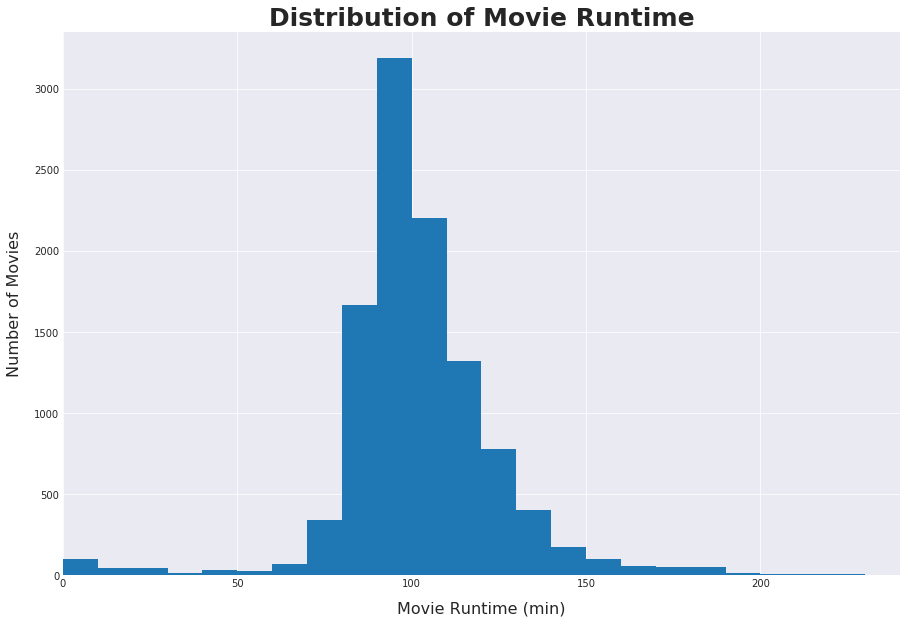

In [39]:
# set the ceiling for runtime and replot a distribution
binsize = 10
bins = np.arange(0, df_clean.runtime.max()+binsize, binsize)

plt.figure(figsize=[15, 10])
plt.hist(data = df_clean, x = 'runtime', bins = bins)

# customize the labels and title
plt.xlabel('Movie Runtime (min)', fontsize = 16, labelpad = 12)
plt.ylabel('Number of Movies', fontsize = 16, labelpad = 12)
plt.xlim([0, 240])
plt.title('Distribution of Movie Runtime', fontweight = 'bold', fontsize = 25)
plt.show()

**Observation 2.3**: The distribtution of runtime is unimodal with right skew. Large part of the data falls between 80 and 120. 

### Research Question 3: What is the trend regarding number of released movies over the past half century?

`Thought process`:<br> 
- group the data by release_year 
- count the total number of movies for each year
- plot a line chart using release_year as y-axis, and number of movies as x-axis
- add annotation for points of interest along the line chart

In [40]:
# group by release_year and get the count of movies for each year
yrs_movies = df_clean.groupby('release_year').count()['id']
movies_by_years = yrs_movies.values
# get all the release_year values
years = yrs_movies.index

In [41]:
# display the first and last year in release_year
first_yr = years[0]
last_yr = years[-1]
print(first_yr, last_yr)

1960 2015


In [42]:
# get the years that first reach the threshold of 200, 400, 600 movies respectively
# and get the number of movies corresponding to these years
thresholds = [200, 400, 600]
yrs_thresholds = []
mvs_thresholds = []
for x in thresholds:
    yrs_thresholds.append(yrs_movies[movies_by_years>x].index[0])
    mvs_thresholds.append(yrs_movies[movies_by_years>x].values[0])

Text(0.5,1,'Number of Movies by Year')

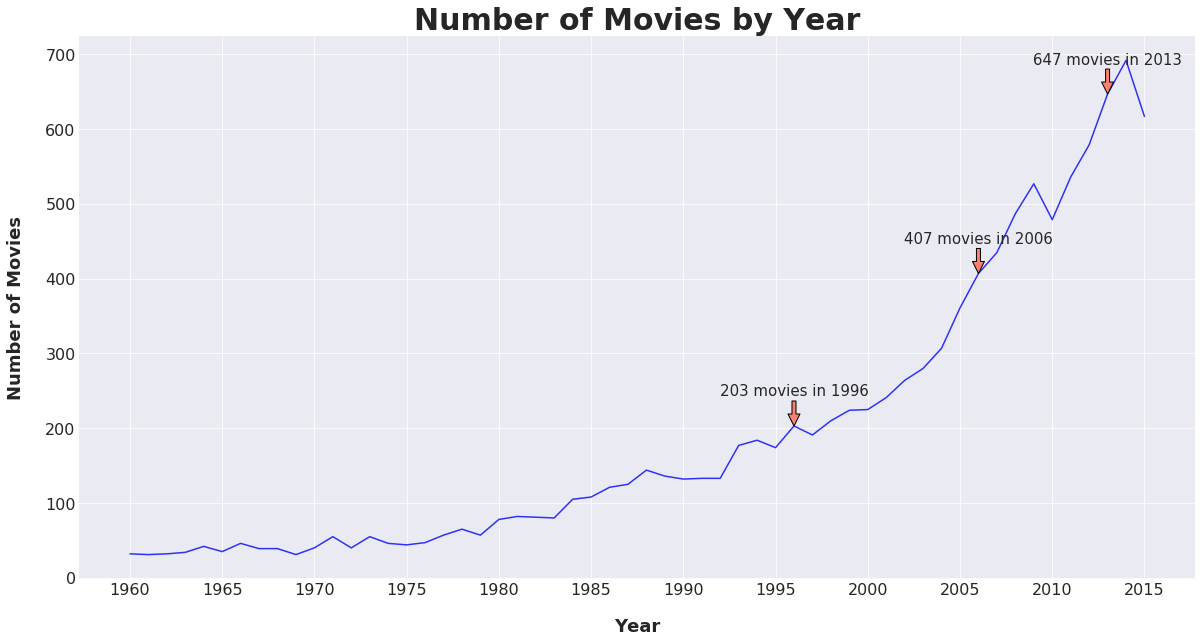

In [43]:
# plot a line chart
plt.figure(figsize=(20,10))
plt.plot(years, movies_by_years, color = 'b', alpha = 0.8)

# add labels of points of interest
for x,y in zip(yrs_thresholds, mvs_thresholds):
    label = "{} movies in {}".format(y, x)
#     plt.text(x, y, '{} movies in {}'.format(y, x), fontsize = 13, horizontalalignment = 'center')
    plt.annotate(label, (x,y), textcoords="offset points", 
                 xytext=(0,30), ha='center',
                 fontsize = 15,
                 arrowprops = dict(facecolor='salmon'))
# customize ticks, labels, and title    
plt.xticks(np.arange(1960, 2015+5, 5), np.arange(1960, 2015+5, 5), fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Year', fontweight = 'bold', fontsize = 18, labelpad = 20)
plt.ylabel('Number of Movies', fontweight = 'bold', fontsize = 18, labelpad = 20)
plt.title('Number of Movies by Year', fontweight = 'bold', fontsize = 30)

**Observation 3**: the number of movies released has an overall trend of increasing from 1960 to 2015 <br><br>
**Obeservation 3.1**: the number of movies released started to rocket up in 1995, and has been staying strong consistently since then <br><br>
**Obeservation 3.2**: it took the movie industry 36 years to reach 200 movies released record; 10 years to reach 400 movies threshold; 7 years to reach 600 

### Research Question 4: What are the trends of keywords over the decades?

`Thought process`:<br> 
- I am only interested in keywords and release_year for this question
- Create a dataframe with only keywords and release_year
- Create a new column 'decades' that categorize each individual release_year by setting bins and using pandas.bin
- Use split() to convert each keywords value into a list, with each keyword a list item
- Group all keywords by decades. Each decades value relates to a list of keywords 
- get the most frequently occurred keyword and its frequency for each keywords value
- plot a bar chart

In [44]:
df_clean.head()

,id,popularity,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [45]:
# create a new dataframe df_keywords with keywords and release_year
df_keywords = df_clean[['keywords', 'release_year']]
# see the first 3 lines of df_keywords 
df_keywords.head(3)

,keywords,release_year
0,monster|dna|tyrannosaurus rex|velociraptor|island,2015
1,future|chase|post-apocalyptic|dystopia|australia,2015
2,based on novel|revolution|dystopia|sequel|dyst...,2015


In [46]:
# get a summary of df_keywords
df_keywords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10772 entries, 0 to 10865
Data columns (total 2 columns):
keywords        9338 non-null object
release_year    10772 non-null object
dtypes: object(2)
memory usage: 252.5+ KB


In [47]:
# drop null values from keywords 
df_keywords.dropna(inplace = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
# verify the drop
df_keywords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9338 entries, 0 to 10865
Data columns (total 2 columns):
keywords        9338 non-null object
release_year    9338 non-null object
dtypes: object(2)
memory usage: 218.9+ KB


In [49]:
# check data type in 'release_year' column
type(df_keywords.release_year[0])

str

In [50]:
# to use pandas.bin, need to convert release_year from string to interger
df_keywords.release_year = df_keywords.release_year.astype(int)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [51]:
# check the datatype after the change
type(df_keywords.release_year[0])

numpy.int64

In [52]:
# check the min and max values of 'release_year'
min = df_keywords.release_year.min()
max = df_keywords.release_year.max()
print(min, max)

1960 2015


In [53]:
# set bin edges that will be used to cut 'release_year' data into groups
bin_edges = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
# set bin labels for the 6 decades
bin_labels = ['1960s','1970s', '1980s', '1990s', '2000s', '2010s']
# create a categorical variable 'decades'
df_keywords['decades'] = pd.cut(df_keywords.release_year, bin_edges, 
                                right = False, labels = bin_labels)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [54]:
# see the first 3 rows of df_keywords
df_keywords.head(3)

,keywords,release_year,decades
0,monster|dna|tyrannosaurus rex|velociraptor|island,2015,2010s
1,future|chase|post-apocalyptic|dystopia|australia,2015,2010s
2,based on novel|revolution|dystopia|sequel|dyst...,2015,2010s


In [55]:
# get a summary of df_keywords
df_keywords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9338 entries, 0 to 10865
Data columns (total 3 columns):
keywords        9338 non-null object
release_year    9338 non-null int64
decades         9338 non-null category
dtypes: category(1), int64(1), object(1)
memory usage: 548.2+ KB


In [56]:
# convert keywords value into a list where each keyword is a list item
df_keywords.keywords = df_keywords.keywords.apply(lambda x: x.split('|'))

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [57]:
# get the first 3 rows 
df_keywords.head(3)

,keywords,release_year,decades
0,"[monster, dna, tyrannosaurus rex, velociraptor...",2015,2010s
1,"[future, chase, post-apocalyptic, dystopia, au...",2015,2010s
2,"[based on novel, revolution, dystopia, sequel,...",2015,2010s


In [58]:
# drop release_year given I will only use keywords and decades for analysis
df_keywords.drop(columns = 'release_year', inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [59]:
# verify the drop
df_keywords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9338 entries, 0 to 10865
Data columns (total 2 columns):
keywords    9338 non-null object
decades     9338 non-null category
dtypes: category(1), object(1)
memory usage: 475.2+ KB


In [60]:
# group all the keywords by decades
df_keywords = df_keywords.groupby('decades', as_index=False).sum()

In [61]:
# check the dataframe
df_keywords

,decades,keywords
0,1960s,"[moon, jupiter, artificial intelligence, man v..."
1,1970s,"[android, galaxy, hermit, death star, lightsab..."
2,1980s,"[clock tower, car race, terrorist, delorean, l..."
3,1990s,"[support group, dual identity, nihilism, rage ..."
4,2000s,"[culture clash, future, space war, space colon..."
5,2010s,"[monster, dna, tyrannosaurus rex, velociraptor..."


In [62]:
# get the most frequent keyword and its frequency for each keywords value
# and store them in two new columns
from collections import Counter
df_keywords['top_keyword'] = df_keywords.keywords.apply(lambda x: Counter(x).most_common(1)[0][0])
df_keywords['frequencies'] = df_keywords.keywords.apply(lambda x: Counter(x).most_common(1)[0][1])

In [63]:
# check the dataframe
df_keywords

,decades,keywords,top_keyword,frequencies
0,1960s,"[moon, jupiter, artificial intelligence, man v...",based on novel,16
1,1970s,"[android, galaxy, hermit, death star, lightsab...",based on novel,23
2,1980s,"[clock tower, car race, terrorist, delorean, l...",nudity,39
3,1990s,"[support group, dual identity, nihilism, rage ...",independent film,80
4,2000s,"[culture clash, future, space war, space colon...",independent film,215
5,2010s,"[monster, dna, tyrannosaurus rex, velociraptor...",woman director,231


In [64]:
# get decades values
decades = df_keywords.decades
# get all top_keywords values
top_keywords = df_keywords.top_keyword
# get frequencies values
frequencies = df_keywords.frequencies

Text(0.5,1,'Top Keyword Trends From 1960s to 2010s')

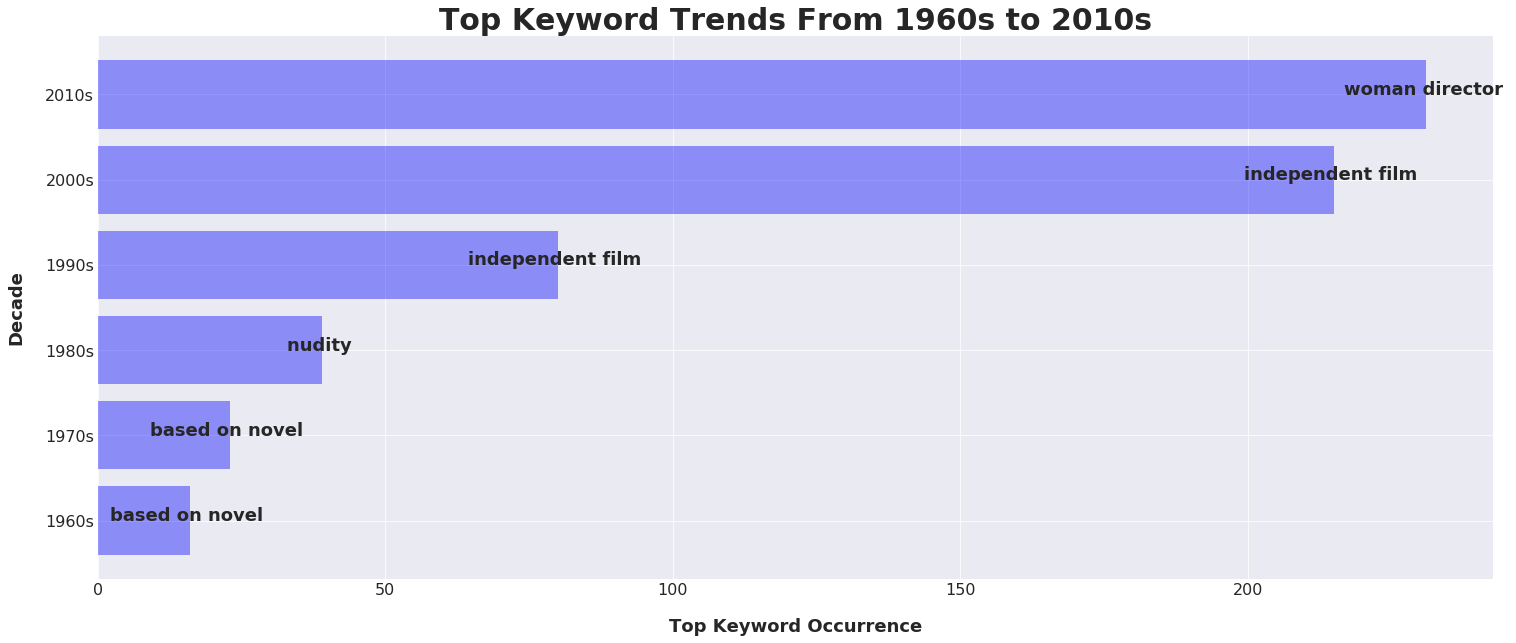

In [65]:
# plot a bar chart
plt.figure(figsize=(25,10))
plt.barh(decades, frequencies, color = 'b', alpha = 0.4)

# add top_keywords as labels 
for x,y,z in zip(frequencies, decades, top_keywords):
    plt.text(x, y, '{} '.format(z), fontsize = 18,  fontweight = 'bold',
             horizontalalignment = 'center')

# customize ticks, labels, and title
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Top Keyword Occurrence', fontweight = 'bold', fontsize = 18, labelpad = 20)
plt.ylabel('Decade', fontweight = 'bold', fontsize = 18, labelpad = 20)
plt.title('Top Keyword Trends From 1960s to 2010s', fontweight = 'bold', fontsize = 30)

**Observation 4**: There are interesting trends over the decades <br><br>
**Obeservation 4.1**: Keyword `based on novel` went strong from 1960s to 1970s. As [The History of Film-The 1960s](https://www.filmsite.org/60sintro4.html) mentions:
> During the early to mid 1960s, Hollywood looked to literary works and the history books for many of its films. The studios were increasingly willing to pay for film rights to various novels and literary works. <br>

**Obeservation 4.2**: Keyword `nudity` dominated 1980s movies. The book [A History of Movie Ratings](https://books.google.com/books?id=shlRAgAAQBAJ&pg=PT39&lpg=PT39&dq=1980s+movies+many+nudity+why+rating&source=bl&ots=AbfLKSfFZW&sig=ACfU3U3JMWRP2cHOkwwmT5lp8v7nBT2rYw&hl=en&sa=X&ved=2ahUKEwjjxeKo667lAhWGq54KHeWXDBgQ6AEwEHoECAgQAQ#v=onepage&q=1980s%20movies%20many%20nudity%20why%20rating&f=false) writes:
> But it wasn't until the early 1980s that Hollywood mainstream movies really began to push the R rating as far as possible with violence and gore, sex and nudity, and foul language

> And excessive sex and nudity became more and more commonplace

> Sex and nudity also overtook a genre of R-rated moes about and aimed at teenagers

**Obeservation 4.3**: Keyword `independent film` stood out from 1990s to 2000s. As [The History of Film-The 1990s](https://www.filmsite.org/90sintro.html) mentions:
> By the end of the decade, most studios had formed independent film divisions (such as Fox's Searchlight division) that would make films with artistic, edgy, or 'serious' social issues or themes, and without major Hollywood stars.

Apparently, the trend of indie movies continued and went even stronger in 2000s.<br>

**Obeservation 4.4**: Keyword `woman director` prevails in 2010s. It's great to see more females wearing director hat than ever before entering 2010s in this male-dominated movie industry. 

### Research Question 5: Do horror films receive worse rating compared to non-horror films over the years?

"I see dead people." <br>
— The Sixth Sense
<br><br>
Horror films have been delievering great enjoyment for me. Though a huge fan of horror films myself, it's hard to deny that horror films are an inferior genre compared with others in box office, quality of the movie, social impact, storytelling, the depth of star-studded lineup, award nomination and more. Horror films also give people the impression of poor audience reviews and ratings. <br><br>
Time to compare the average rating of horror films with that of non-horror films and let the data tells the story.

In [66]:
# get the descriptive statistics summary of df_clean
df_clean.describe()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10772.000000,10772.000000,10772.000000,10772.000000,5.161000e+03,4.848000e+03
mean,0.650643,102.455347,219.114463,5.972289,3.694143e+07,1.151223e+08
std,1.003319,30.379156,577.826118,0.932877,4.197228e+07,1.988706e+08
min,0.000188,2.000000,10.000000,1.500000,9.210911e-01,2.370705e+00
25%,0.209987,90.000000,17.000000,5.400000,8.131203e+06,1.046477e+07
50%,0.386176,99.000000,39.000000,6.000000,2.278180e+07,4.396405e+07
75%,0.718889,112.000000,147.000000,6.600000,5.008384e+07,1.316524e+08
max,32.985763,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


`Reasoning`: <br>
from the descriptive statistics summary, vote_average has a low of 1.5 and high of 9.2 with a mean of 5.97. <br>
The voting system seems to be within a scale of 1 to 10, and can be treated as equivalent to the common movie rating of 1 to 10.

`Thought process`:<br> 
- Create a dataframe with id, genres, vote_average, release_year
- Create a new column 'decades' that categorize each individual release_year by setting bins and using pandas.bin
- Use split() to convert each genres value into a list with each genre a list item
- Create a new column that holds `True` if horror is in genres and `False` otherwise
- get the vote_average values for both horror films and non-horror films by decades
- get the difference of vote_average by decades
- plot a bar chart

In [67]:
# create a dataframe with id, genres, vote_average, release_year
df_genres = df_clean[['id','genres','vote_average','release_year']]

In [68]:
# check the dataframe
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10772 entries, 0 to 10865
Data columns (total 4 columns):
id              10772 non-null object
genres          10772 non-null object
vote_average    10772 non-null float64
release_year    10772 non-null object
dtypes: float64(1), object(3)
memory usage: 420.8+ KB


In [69]:
# release_year is an object type
# to use pandas.bin, need to convert release_year to interger
df_genres.release_year = df_genres.release_year.astype(int)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [70]:
# set bin edges that will be used to cut 'release_year' data into groups
bin_edges = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
# set bin labels for the 6 decades
bin_labels = ['1960s','1970s', '1980s', '1990s', '2000s', '2010s']
# create a categorical variable 'decades'
df_genres['decades'] = pd.cut(df_genres.release_year, bin_edges, 
                                right = False, labels = bin_labels)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [71]:
# see the first 3 rows of df_genres
df_genres.head(3)

,id,genres,vote_average,release_year,decades
0,135397,Action|Adventure|Science Fiction|Thriller,6.5,2015,2010s
1,76341,Action|Adventure|Science Fiction|Thriller,7.1,2015,2010s
2,262500,Adventure|Science Fiction|Thriller,6.3,2015,2010s


In [72]:
# convert each genres value into a list
df_genres.genres = df_genres.genres.apply(lambda x: x.split('|'))

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [73]:
# check the change
df_genres.head(3)

,id,genres,vote_average,release_year,decades
0,135397,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015,2010s
1,76341,"[Action, Adventure, Science Fiction, Thriller]",7.1,2015,2010s
2,262500,"[Adventure, Science Fiction, Thriller]",6.3,2015,2010s


In [74]:
# Create a boolean variable that holds `True` if horror is in genres and `False` otherwise
df_genres['horror'] = df_genres.genres.apply(lambda x:'Horror' in x)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [75]:
# check the change
df_genres.head(5)

,id,genres,vote_average,release_year,decades,horror
0,135397,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015,2010s,False
1,76341,"[Action, Adventure, Science Fiction, Thriller]",7.1,2015,2010s,False
2,262500,"[Adventure, Science Fiction, Thriller]",6.3,2015,2010s,False
3,140607,"[Action, Adventure, Science Fiction, Fantasy]",7.5,2015,2010s,False
4,168259,"[Action, Crime, Thriller]",7.3,2015,2010s,False


In [76]:
# group by decades and get the vote_average for horror and non-horror films
df_q3 = df_genres.groupby(('decades', 'horror'), as_index = False)['vote_average'].mean()
# use for loop to get the difference of vote_average for horror and non-horror films by decade
diffs = []
decades = df_q3.decades.unique()

for x in decades:
    vote_h = df_q3[df_q3.decades == x].query('horror == True').vote_average.values[0]
    vote_non_h = df_q3[df_q3.decades == x].query('horror == False').vote_average.values[0]
    diff = vote_h - vote_non_h
    diffs.append(diff)
diffs

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


[-0.20611871527307724,
 -0.36036165327209879,
 -0.39798780060296046,
 -0.59059130013328254,
 -0.76218793960232212,
 -1.0579103123066007]

Text(0.5,1,'Horror vs. Non-Horror Movie Average Rating Difference by Decade')

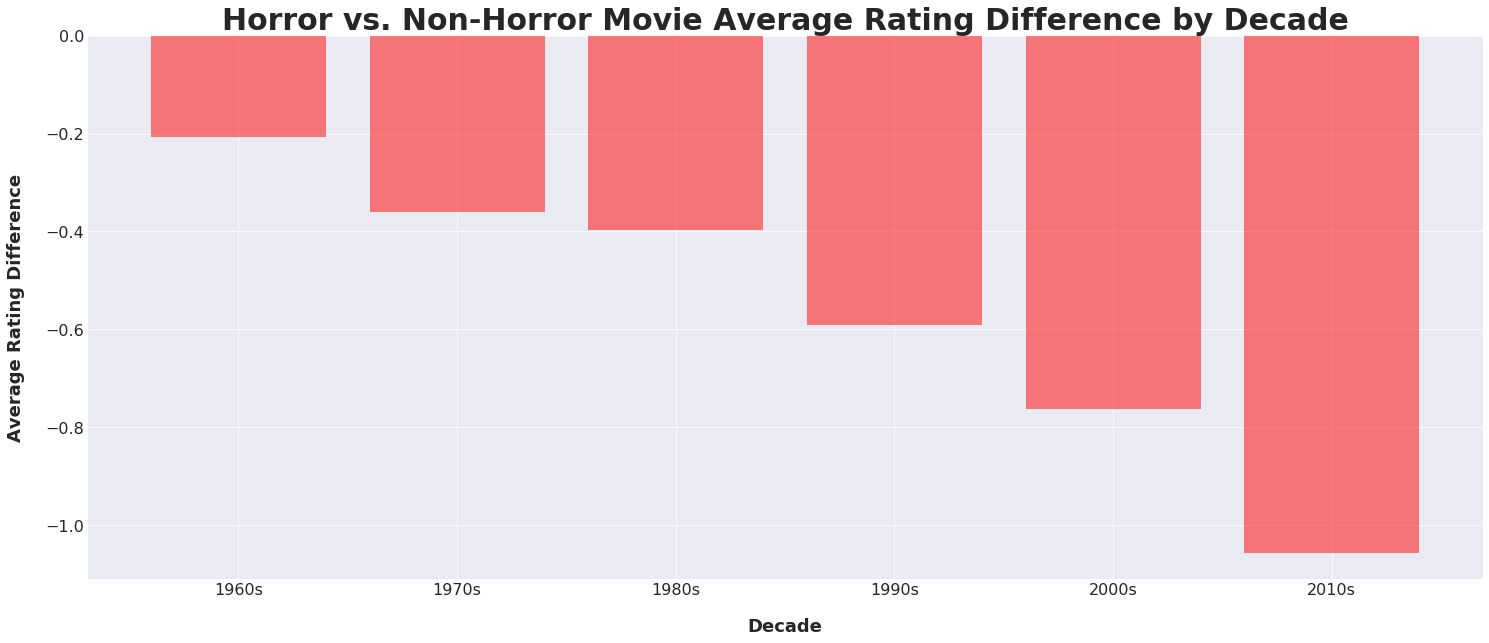

In [77]:
# plot a bar chart
plt.figure(figsize=(25,10))
plt.bar(decades, diffs, color = 'r', alpha = 0.5)

# customize ticks, labels, and title  
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Decade', fontweight = 'bold', fontsize = 18, labelpad = 20)
plt.ylabel('Average Rating Difference', fontweight = 'bold', fontsize = 18, labelpad = 20)
plt.title('Horror vs. Non-Horror Movie Average Rating Difference by Decade', 
          fontweight = 'bold', fontsize = 30)

**Observation 5.1**: The average vote of horror films has consistently been lower than that non-horror films over the decades <br>
**Observation 5.2**: The gap has been growing as well, from around 0.2 in 1960s to over 1 point of average rating difference in 2010s <br>
**Observation 5.3**: The expansion of such gap started to accelerate from 1990s through 2010s

### Research Question 6: Do more and more horror films released since 1990?

`Thought process`:<br> 
- Create a dataframe that includes only horror movie data and release_year after 1990
- Group by release_year and get the total of horror films per year from 1990 to 2015
- Group by release_year and get the total of films per year from 1990 to 2015
- Compute the proportion of horror films per year
- plot a line chart

In [78]:
# create a dataframe includes only horror film and release_year after 1990
df_horror = df_genres.query('release_year >= 1990 and horror == True')

In [79]:
# get the total of horror films per year since 1990
counts_horror = df_horror.groupby('release_year').count()['id']

In [80]:
# get the total of films per year since 1990
totals = df_genres.query('release_year >= 1990').groupby('release_year').count()['id']

In [81]:
# compute the proportion of horror films in films released per year
horror_proportion = counts_horror/totals

In [82]:
# get the release_year data for x-axis
release_years = horror_proportion.index
# get the proportion values for y-axis
proportions = horror_proportion.values

Text(0.5,1,'Horror Films in % of All Films by Year')

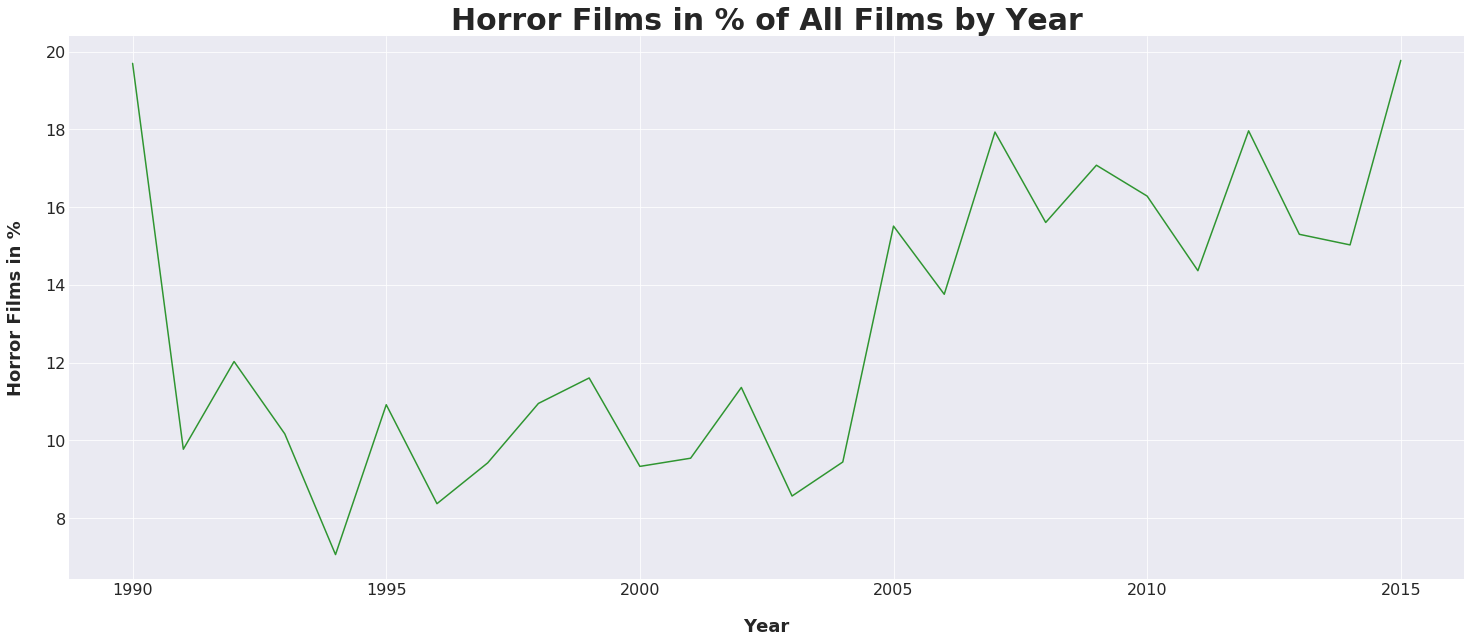

In [83]:
# plot a line chart
plt.figure(figsize=(25,10))
plt.plot(release_years, proportions*100, color = 'g', alpha = 0.8)

# customize ticks, labels, and title  
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Year', fontweight = 'bold', fontsize = 18, labelpad = 20)
plt.ylabel('Horror Films in %', fontweight = 'bold', fontsize = 18, labelpad = 20)
plt.title('Horror Films in % of All Films by Year', 
          fontweight = 'bold', fontsize = 30)

**Observation 6.1**: Horror films dropped drastically in its percentage of all films after the year 1990 and struggled all the way till entering the second half of 2000s, with a history low in 1994, which is around 20 times lower than the percentage in 1990.<br>
**Observation 6.2**: Entering the second half of 2000s, horror films regained its youth with a upward trend in its percentage among all films, and stayed strong in 2010s

<a id='conclusions'></a>
## Conclusions
Through the steps involved in a typical data analysis process, I explored and observed trends and insights that answer the research questions I proposed.<br><br>
### 1. Distribution of average vote
In the distribution, big part of the average vote data falls between 5 to 7.
<br><br>
### 2. Distribution of movie runtime
In the distribtution of runtime, large part of the data falls between 80 and 120 minutes. Also, there are 40 movies with more than 4 hours of runtime. The longest movie is 'The Story of Film: An Odyssey', with a total runtime of 15 hours. 
<br><br>
### 3. Trend regarding number of released movies over the past half century
As a general trend, the number of movies keeps increasing from 1960 to 2015. The increase started to take on fast lane since 1995. To measure how drastic the increase has been, I set 200, 400, and 600 movies as three thresholds. The obervasion is impressive. It took Hollywood 36 years to reach 200 movies milestone, 10 years to reach 400 movies, and just 7 years to reach 600. 
<br><br>
### 4. Trends of keywords among different decades
It's very interesting to see the different keyword trend in each decade. <br><br>
From 1960s to 1970s, `based on novel` is the top keyword. Moving on to 1980s, keyword `nudity` dominated. In both 1990s to 2000s `independent film` claimed the throne. Entering 2010s, `woman director`. <br><br>With some online research, I also unfold slices of history that relate or explain the keyword trends. 
<br><br>
### 5. Average rating of horror films vs. non-horror films
I try to discover if horror films always have an lower average rating than non-horror films. I separate films into two categories, horror films and non-horror films, and compare their average ratings in each decade by computing the average rating difference. <br><br>The finding shows that the average vote of horror films has consistently been lower than that non-horror films over the decades. The gap of average rating difference has been growing from around 0.2 in 1960s to over 1 in 2010s. 1 whole point in average rating difference is huge!The expansion of such gap started to accelerate from 1990s through 2010s.
<br><br>
### 6. Horror films in percentage of all films since 1990
I also try to discover the number of horror films in the market since 1990. But I am not interested in looking at the absolute numbers, but horror films in percentage among all films in each year.<br><br>
To my surprise, horror films dropped drastically in its percentage of all films after the year 1990 and struggled for the rest of 1990s and the first half of 2000s. During this period, the percentage reached a history low in 1994, which is around 20 times lower than the percentage in 1990.<br><br>
Starting from 2005, horror films regained its youth with a upward trend in its percentage among all films, and stayed strong in 2010s. <br><br>
If you are a big fan of horror films like I do, time to cheer. With films like 'Get out', 'Us', and 'Conjuring' franchise outperformed in box office and gathered great reviews, the industry is definitely want to make more, and thus I anticipate even higher percentage in the furture. 
<br><br>
## Limitation
First of all, I am not sure if this dataset is representative of all the movies released over the years. An ineffective representation would hindered my analysis, especially when a large part of investigation is on film trend by year/decade.
<br><br>
Also, I suspect some of the films with thriller in its genre but without horror are in fact R-rated horror films. This will also impact the analysis on trends of horror films.
<br><br>
Moreover, because the revenue_adj and budge_adj have huge amount of null values, so I didn't introduce them into my investigation of horror films. However, I am very certain that adding these two columns will create more insights for my analysis if they were with better data quality.